# Within Method Type Comparisons

This notebooks runs a set of comparisons across methods, within method types (eg. comparing different complexity measures to each other). 

It does so for the following method categories (that have multiple methods):
- Fluctuations
- Fractal Dimension
- Complexity
- Entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_comparisons
from apm.analysis import compute_all_corrs
from apm.plts import plot_dots
from apm.plts.utils import make_axes
from apm.plts.settings import EXT, COLORS
from apm.methods import (hurst, dfa, 
                         higuchi_fd, katz_fd, petrosian_fd, sevcik_fd,
                         hjorth_mobility, hjorth_complexity, lempelziv, lyapunov,
                         app_entropy, sample_entropy, perm_entropy, wperm_entropy)
from apm.methods.settings import (HURST_PARAMS, DFA_PARAMS,
                                  HFD_PARAMS, KFD_PARAMS, PFD_PARAMS, SFD_PARAMS,
                                  HJM_PARAMS, HJC_PARAMS, LZ_PARAMS, LY_PARAMS,
                                  AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.sim.settings import SIM_PARAMS_COMB
from apm.sim.params import sampler
from apm.utils import format_corr

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/plts/data.py:7: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.utils import trim_spectrum


In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for running comparisons
RETURN_SIM_PARAMS = True

In [6]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '41_within_comp'

In [7]:
# Set the number of simulations to run
N_SIMS = 1000

In [8]:
# Define ranges to sample parameters from
samplers = {'update_comb_exp' : sampler(np.arange(-2.5, 0.1, 0.1)),
            'update_pow' : sampler(np.arange(0, 1.1, 0.1),
                                   probs = [0.30] + ([0.07] * 10)),
            'update_freq' : sampler(np.arange(5, 36, 1))}

In [9]:
# Collect together info & plot settings 
dot_kwargs = {'s' : 25, 'alpha' : 0.25}

## Fluctuations

In [10]:
# Define measures to apply - fluctuations
measures_fluc = {
    hurst : HURST_PARAMS, 
    dfa : DFA_PARAMS,
}

In [11]:
# Run simulations, comparing fluctuation measures
results_fluc, all_sim_params_fluc = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_fluc, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [12]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fluc = compute_all_corrs(results_fluc)
all_corrs_osc_fluc = compute_all_corrs(results_fluc, all_sim_params_fluc['has_osc'].values)
all_corrs_no_osc_fluc = compute_all_corrs(results_fluc, ~all_sim_params_fluc['has_osc'].values)

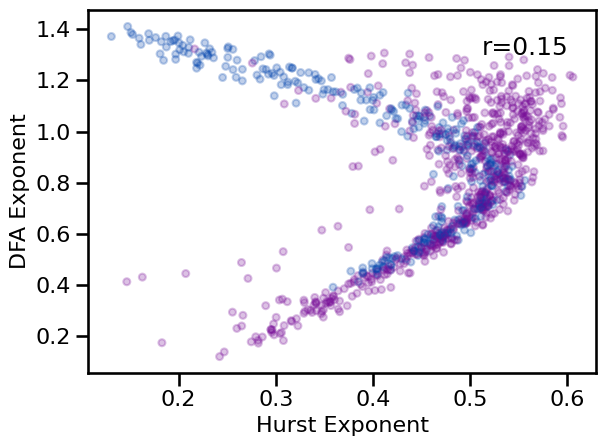

In [13]:
# Plot comparisons
dot_kwargs['c'] = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fluc.has_osc]
plot_dots(results_fluc['hurst'], results_fluc['dfa'], tposition='tr', **dot_kwargs,
          xlabel='Hurst Exponent', ylabel='DFA Exponent')
if SAVE_FIG: plt.savefig(FIGPATH / ('fluc_comp' + EXT))

In [14]:
print('Correlations:')
print('  Hurst & DFA:\t', format_corr(*all_corrs_fluc['hurst']['dfa']))

Correlations:
  Hurst & DFA:	 r=+0.150  CI[+0.071, +0.231],  p=0.000


## Fractal Dimension

In [15]:
# Define measures to apply - fractal dimension
measures_fd = {
    higuchi_fd : HFD_PARAMS,
    katz_fd : KFD_PARAMS,
    petrosian_fd : PFD_PARAMS,
    sevcik_fd : SFD_PARAMS,
}

In [16]:
# Run simulations, comparing fractal dimension measures
results_fd, all_sim_params_fd = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_fd, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [17]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fd = compute_all_corrs(results_fd)
all_corrs_osc_fd = compute_all_corrs(results_fd, all_sim_params_fd['has_osc'].values)
all_corrs_no_osc_fd = compute_all_corrs(results_fd, ~all_sim_params_fd['has_osc'].values)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


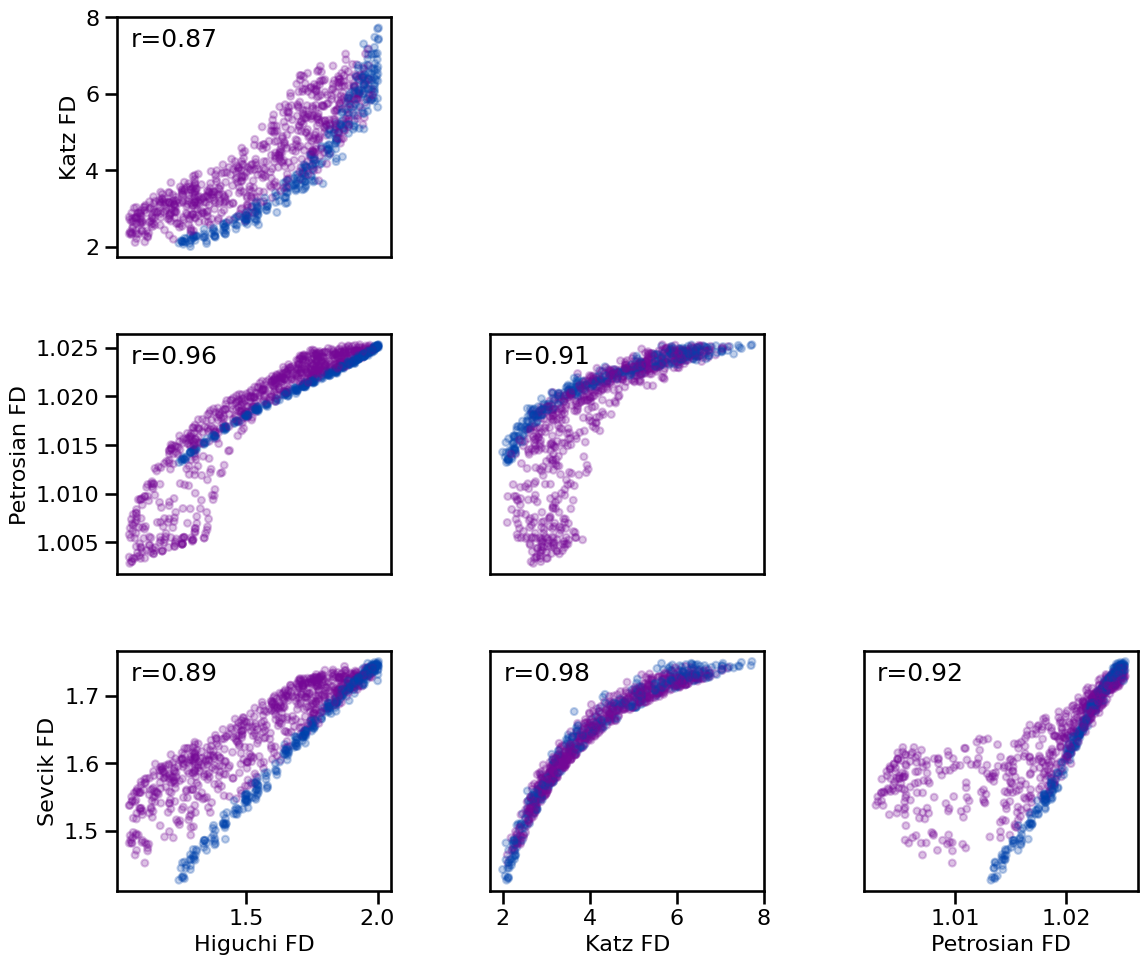

In [18]:
# Plot comparisons
dot_kwargs['c'] = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fd.has_osc]
axes = make_axes(3, 3, figsize=[12, 10], wspace=0.01, hspace=0.01)
plot_dots(results_fd['higuchi_fd'], results_fd['katz_fd'], tposition='tl', **dot_kwargs,
          xticks=[], ylabel='Katz FD', ax=axes[0, 0])
plot_dots(results_fd['higuchi_fd'], results_fd['petrosian_fd'], tposition='tl', **dot_kwargs,
          xticks=[], ylabel='Petrosian FD', ax=axes[1, 0])
plot_dots(results_fd['higuchi_fd'], results_fd['sevcik_fd'], tposition='tl', **dot_kwargs,
          xlabel='Higuchi FD', ylabel='Sevcik FD', ax=axes[2, 0])
plot_dots(results_fd['katz_fd'], results_fd['petrosian_fd'], tposition='tl', **dot_kwargs,
          xticks=[], yticks=[], ax=axes[1, 1])
plot_dots(results_fd['katz_fd'], results_fd['sevcik_fd'], tposition='tl', **dot_kwargs,
          xlabel='Katz FD', yticks=[], ax=axes[2, 1])
plot_dots(results_fd['petrosian_fd'], results_fd['sevcik_fd'], tposition='tl', **dot_kwargs,
          xlabel='Petrosian FD', yticks=[], ax=axes[2, 2])
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 2].axis('off')
if SAVE_FIG: plt.savefig(FIGPATH / ('fractal_comp' + EXT))

In [19]:
print('Correlations:')
print('  Higuchi & Katz:\t', format_corr(*all_corrs_fd['higuchi_fd']['katz_fd']))
print('  Higuchi & Petrosian:\t', format_corr(*all_corrs_fd['higuchi_fd']['petrosian_fd']))
print('  Higuchi & Sevcik:\t', format_corr(*all_corrs_fd['higuchi_fd']['sevcik_fd']))
print('  Katz & Petrosian:\t', format_corr(*all_corrs_fd['katz_fd']['petrosian_fd']))
print('  Katz & Sevcik:\t', format_corr(*all_corrs_fd['katz_fd']['sevcik_fd']))
print('  Petrosian & Sevcik:\t', format_corr(*all_corrs_fd['petrosian_fd']['sevcik_fd']))

Correlations:
  Higuchi & Katz:	 r=+0.875  CI[+0.863, +0.884],  p=0.000
  Higuchi & Petrosian:	 r=+0.957  CI[+0.950, +0.962],  p=0.000
  Higuchi & Sevcik:	 r=+0.894  CI[+0.884, +0.903],  p=0.000
  Katz & Petrosian:	 r=+0.906  CI[+0.892, +0.918],  p=0.000
  Katz & Sevcik:	 r=+0.985  CI[+0.982, +0.987],  p=0.000
  Petrosian & Sevcik:	 r=+0.922  CI[+0.907, +0.934],  p=0.000


## Complexity

In [20]:
# Define measures to apply - complexity
measures_cp = {
    hjorth_mobility : HJM_PARAMS,
    hjorth_complexity : HJC_PARAMS,
    lempelziv : LZ_PARAMS,
    lyapunov : LY_PARAMS,
}

In [21]:
# Run simulations, comparing complexity measures
results_cp, all_sim_params_cp = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_cp, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [22]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_cp = compute_all_corrs(results_cp)
all_corrs_osc_cp = compute_all_corrs(results_cp, all_sim_params_cp['has_osc'].values)
all_corrs_no_osc_cp = compute_all_corrs(results_cp, ~all_sim_params_cp['has_osc'].values)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


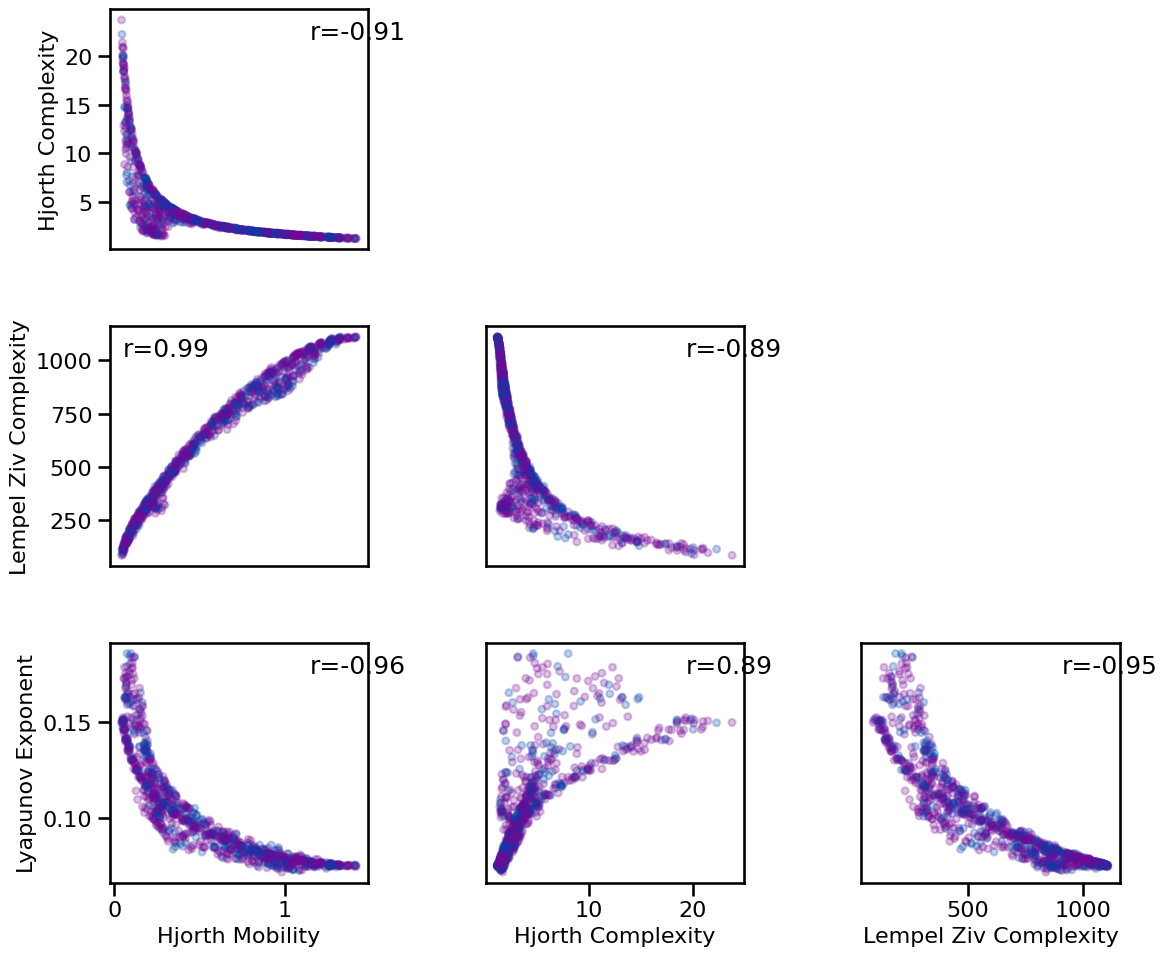

In [34]:
# Plot comparisons
dot_kwargs['c'] = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fd.has_osc]
axes = make_axes(3, 3, figsize=[12, 10], wspace=0.4, hspace=0.4)
plot_dots(results_cp['hjorth_mobility'], results_cp['hjorth_complexity'], tposition='tr', **dot_kwargs,
          xticks=[], ylabel='Hjorth Complexity', ax=axes[0, 0])
plot_dots(results_cp['hjorth_mobility'], results_cp['lempelziv'], tposition='tl', **dot_kwargs,
          xticks=[], ylabel='Lempel Ziv Complexity', ax=axes[1, 0])
plot_dots(results_cp['hjorth_mobility'], results_cp['lyapunov'], tposition='tr', **dot_kwargs,
          xlabel='Hjorth Mobility', ylabel='Lyapunov Exponent', ax=axes[2, 0])
plot_dots(results_cp['hjorth_complexity'], results_cp['lempelziv'], tposition='tr', **dot_kwargs,
          xticks=[], yticks=[], ax=axes[1, 1])
plot_dots(results_cp['hjorth_complexity'], results_cp['lyapunov'], tposition='tr', **dot_kwargs,
          xlabel='Hjorth Complexity', yticks=[], ax=axes[2, 1])
plot_dots(results_cp['lempelziv'], results_cp['lyapunov'], tposition='tr', **dot_kwargs,
          xlabel='Lempel Ziv Complexity', yticks=[], ax=axes[2, 2])
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 2].axis('off')
if SAVE_FIG: plt.savefig(FIGPATH / ('compl_comp' + EXT))

In [24]:
print('Correlations:')
print('  HJM & HJC:\t\t', format_corr(*all_corrs_cp['hjorth_mobility']['hjorth_complexity']))
print('  HJM & LempelZiv:\t', format_corr(*all_corrs_cp['hjorth_mobility']['lempelziv']))
print('  HJM & Lyapunov:\t', format_corr(*all_corrs_cp['hjorth_mobility']['lyapunov']))
print('  HJC & LempelZiv:\t', format_corr(*all_corrs_cp['hjorth_complexity']['lempelziv']))
print('  HJC & Lyapunov:\t', format_corr(*all_corrs_cp['hjorth_complexity']['lyapunov']))
print('  LempelZiv & Lyapunov:\t', format_corr(*all_corrs_cp['lempelziv']['lyapunov']))

Correlations:
  HJM & HJC:		 r=-0.911  CI[-0.931, -0.890],  p=0.000
  HJM & LempelZiv:	 r=+0.994  CI[+0.992, +0.995],  p=0.000
  HJM & Lyapunov:	 r=-0.962  CI[-0.965, -0.958],  p=0.000
  HJC & LempelZiv:	 r=-0.895  CI[-0.919, -0.867],  p=0.000
  HJC & Lyapunov:	 r=+0.890  CI[+0.870, +0.908],  p=0.000
  LempelZiv & Lyapunov:	 r=-0.947  CI[-0.952, -0.941],  p=0.000


## Entropy

In [25]:
# Define measures to apply - entropy
measures_ent = {
    app_entropy : AP_ENT_PARAMS,
    sample_entropy : SA_ENT_PARAMS,
    perm_entropy : PE_ENT_PARAMS,
    wperm_entropy : WPE_ENT_PARAMS,
}

In [26]:
# Run simulations, comparing entropy measures
results_ent, all_sim_params_ent = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_ent, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [27]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_ent = compute_all_corrs(results_ent)
all_corrs_osc_ent = compute_all_corrs(results_ent, all_sim_params_cp['has_osc'].values)
all_corrs_no_osc_ent = compute_all_corrs(results_ent, ~all_sim_params_cp['has_osc'].values)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


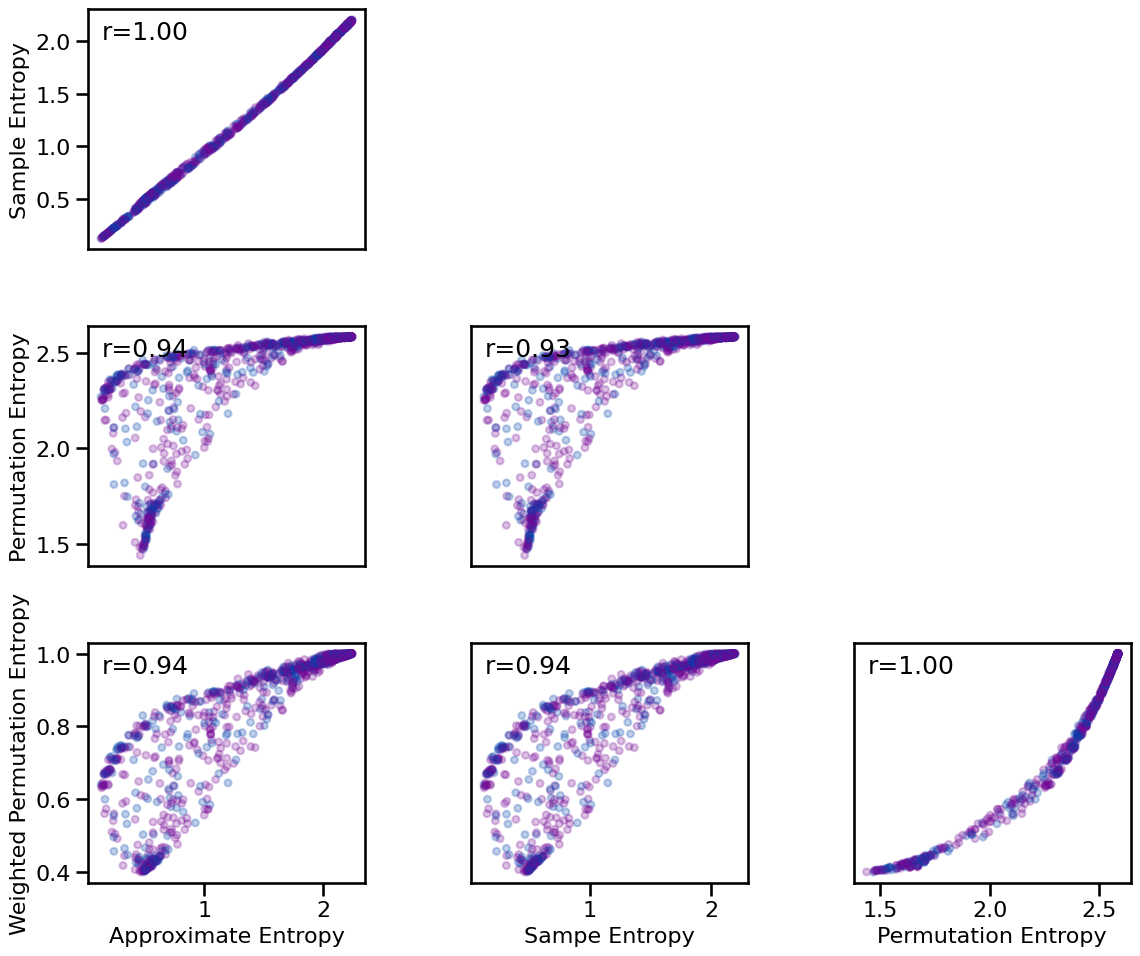

In [28]:
# Plot comparisons
dot_kwargs['c'] = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fd.has_osc]
axes = make_axes(3, 3, figsize=[12, 10], wspace=0.4, hspace=0.4)
plot_dots(results_ent['app_entropy'], results_ent['sample_entropy'], tposition='tl', **dot_kwargs,
          xticks=[], ylabel='Sample Entropy', ax=axes[0, 0])
plot_dots(results_ent['app_entropy'], results_ent['perm_entropy'], tposition='tl', **dot_kwargs,
          xticks=[], ylabel='Permutation Entropy', ax=axes[1, 0])
plot_dots(results_ent['app_entropy'], results_ent['wperm_entropy'], tposition='tl', **dot_kwargs,
          xlabel='Approximate Entropy', ylabel='Weighted Permutation Entropy', ax=axes[2, 0])
plot_dots(results_ent['sample_entropy'], results_ent['perm_entropy'], tposition='tl', **dot_kwargs,
          xticks=[], yticks=[], ax=axes[1, 1])
plot_dots(results_ent['sample_entropy'], results_ent['wperm_entropy'], tposition='tl', **dot_kwargs,
          xlabel='Sampe Entropy', yticks=[], ax=axes[2, 1])
plot_dots(results_ent['perm_entropy'], results_ent['wperm_entropy'], tposition='tl', **dot_kwargs,
          xlabel='Permutation Entropy', yticks=[], ax=axes[2, 2])
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 2].axis('off')
if SAVE_FIG: plt.savefig(FIGPATH / ('info_comp' + EXT))

In [36]:
print('Correlations:')
print('  Approximate & Sample:\t\t', format_corr(*all_corrs_ent['app_entropy']['sample_entropy']))
print('  Approximate & Permutation:\t', format_corr(*all_corrs_ent['app_entropy']['perm_entropy']))
print('  Approximate & Weight Perm:\t', format_corr(*all_corrs_ent['app_entropy']['wperm_entropy']))
print('  Sample & Permutation:\t\t', format_corr(*all_corrs_ent['sample_entropy']['perm_entropy']))
print('  Sample & Weight Perm:\t\t', format_corr(*all_corrs_ent['sample_entropy']['wperm_entropy']))
print('  Permutation & Weight Perm:\t', format_corr(*all_corrs_ent['perm_entropy']['wperm_entropy']))

Correlations:
  Approximate & Sample:		 r=+1.000  CI[+1.000, +1.000],  p=0.000
  Approximate & Permutation:	 r=+0.937  CI[+0.926, +0.946],  p=0.000
  Approximate & Weight Perm:	 r=+0.943  CI[+0.932, +0.951],  p=0.000
  Sample & Permutation:		 r=+0.933  CI[+0.921, +0.943],  p=0.000
  Sample & Weight Perm:		 r=+0.939  CI[+0.929, +0.948],  p=0.000
  Permutation & Weight Perm:	 r=+0.999  CI[+0.999, +0.999],  p=0.000
